We import the required python library for the homework below. Note that we have imported a python file(myFunction) that contains some functions we defined ourselves. Those functions will be explained in the appropriate palces before it is to be used in the document.

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
#mpl.use('TkAgg')
#####
import myFunction # the function  has been defined by us
####
import seaborn as sns 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import Data and  View the shape of data
We imported the data and verify its shape  as a first step in exploratory analysis of the data. We also provide a quick look of the first few rows of the data set. With this we get  a first hand visualization of the  data set.

In [3]:
RawData_CrowdstormingDataJuly1st = pd.read_csv('CrowdstormingDataJuly1st.csv')
print("Data Shape is: "  + str(RawData_CrowdstormingDataJuly1st.shape)) # we use  str to convert tuple to string.
RawData_CrowdstormingDataJuly1st[1:3]

Data Shape is: (146028, 28)


,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


# Get Summary of Statistics About Data
We provide a quick  summary of statistics about the data set. From this view we observe tha Nan is present in our data set and we have to do some cleaning. We also note that columns of  data type  object  (categorical variables)  were not reported here. We will deal with this as we go on.

In [5]:
RawData_CrowdstormingDataJuly1st.describe() 

//anaconda/envs/seychelles/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,145765.000000,143785.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,124621.000000,124621.000000,146028.000000,146028.000000,145865.000000,1.458650e+05,1.458650e+05,145865.000000,1.458650e+05,145865.000000
mean,181.935938,76.075662,2.921166,1.278344,0.708241,0.934581,0.338058,0.385364,0.011381,0.012559,0.264255,0.302862,1534.827444,29.642842,0.346276,1.969741e+04,6.310849e-04,0.452026,2.044023e+04,0.002994
std,6.738726,7.140906,3.413633,1.790725,1.116793,1.383059,0.906481,0.795333,0.107931,0.112889,0.295382,0.293020,918.736625,27.496189,0.032246,1.271262e+05,4.735857e-03,0.217469,1.306157e+05,0.019723
min,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,641.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1604.000000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,2345.000000,44.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660


# Dealing with NaN

We make a copy of the Raw_CrowdstormingDataJuly1st as CrowdstormingDataJuly1st.
With this we aim to leave the Raw_CrowdstormingDataJuly1st as default and continue preprocessing on CrowdstormingDataJuly1st. This division is mainly to enable us have one data set as default and the other as preprocessed one. This might be useful for comparison and analytical reasons.

In [6]:
# Next we make a copy of the data set. The new copy will be processed to remove Nan
CrowdstormingDataJuly1st = RawData_CrowdstormingDataJuly1st.copy()


To deal with Nan we have to know where the Nans are in the data set.Columns with Nana will be filled with appropriate value to replace the NAn. We output the columns that has Nan.
In addition we obtain columns of object datatype so that we can fill Nan in such columns with unique value

In [7]:
##Columns with Null
ColumnsWithNullValues =CrowdstormingDataJuly1st.columns[pd.isnull(CrowdstormingDataJuly1st).any()]
print('columns with null :');print ( ColumnsWithNullValues);
## Columns with data type Objects
print('\ncolumns of object datatype')
[key for key in dict(CrowdstormingDataJuly1st.dtypes) if dict(CrowdstormingDataJuly1st.dtypes)[key] in [ 'object']]

columns with null :
Index(['height', 'weight', 'position', 'photoID', 'rater1', 'rater2',
       'Alpha_3', 'meanIAT', 'nIAT', 'seIAT', 'meanExp', 'nExp', 'seExp'],
      dtype='object')

columns of object datatype


['player',
 'playerShort',
 'club',
 'birthday',
 'position',
 'photoID',
 'leagueCountry',
 'Alpha_3']

For columns of Object data type having Nan in its values we replace the Nan with "Unknown". 

In [8]:
#We change the null value present in the object types datatypes below to UNKNOWN and return the shape of cells affected
# We would not
object_cols = CrowdstormingDataJuly1st.blocks['object'].columns
DictiontionaryToReplaceNanInObject=dict((col, 'Unknown') for col in object_cols)
CrowdstormingDataJuly1st.fillna(value=dict(DictiontionaryToReplaceNanInObject),inplace=True);

We convert column position  to string  type. This will enable viewing multiple string column values (e.g "Attacking MidFielder") as one lexical word. This is important since the encoder-which we define later- now has to enode "Attacking MidFielder" as single semantic world but not "Attacking" and "MidFielder" as separate lexical entities. 


In [9]:
CrowdstormingDataJuly1st['position'] = CrowdstormingDataJuly1st['position'].astype('str') 

Since for the first part of our Classifier we will use rater1 and rater2 as our target variable we would do a little check on both here. A quick check shows that there is no column where rater1 is null and rater2 is not null (or the other way round). This means there is a condition where both rater1 and rater are reported as Values or both reported as Nan.

In [10]:
Rater1NotNullAndRater2Null =CrowdstormingDataJuly1st[CrowdstormingDataJuly1st['rater1'].notnull() & 
                         (CrowdstormingDataJuly1st['rater2'].isnull())]
Rater1NotNullAndRater2Null = CrowdstormingDataJuly1st[CrowdstormingDataJuly1st['rater1'].isnull() & 
                         (CrowdstormingDataJuly1st['rater2'].notnull())]
Rater1NullAndRater2Null=CrowdstormingDataJuly1st[CrowdstormingDataJuly1st['rater1'].isnull() & 
                         (CrowdstormingDataJuly1st['rater2'].isnull())]
Rater1NotNullAndRater2NotNull = CrowdstormingDataJuly1st[CrowdstormingDataJuly1st['rater1'].notnull() & 
                         (CrowdstormingDataJuly1st['rater2'].notnull())]
print("Subset of Dataset for which Rater1 is not null and Rater2 is null:"); print(Rater1NotNullAndRater2Null.shape)
print("Subset of Dataset for which Rater1 is null and Rater2 is not null:");print(Rater1NotNullAndRater2Null.shape)
print("Subset of Dataset for which Rater1 and Rater2 is null:");print(Rater1NullAndRater2Null.shape)
print("Subset of Dataset for which Rater1 and Rater2 is not null:");print(Rater1NotNullAndRater2NotNull.shape)
        

Subset of Dataset for which Rater1 is not null and Rater2 is null:
(0, 28)
Subset of Dataset for which Rater1 is null and Rater2 is not null:
(0, 28)
Subset of Dataset for which Rater1 and Rater2 is null:
(21407, 28)
Subset of Dataset for which Rater1 and Rater2 is not null:
(124621, 28)


From the result above we know that we can collect  rows which  both rater1 and rater2 are not null. We then compute the percentage of data we have left to work with. Here we make use our the length of  RawData_CrowdstormingDataJuly1st in denominator. The RawData_CrowdstormingDataJuly1st was the data set we imported and left as default(no change).

In [11]:
CrowdstormingDataJuly1st = CrowdstormingDataJuly1st[CrowdstormingDataJuly1st['rater1'].notnull() & 
                         (CrowdstormingDataJuly1st['rater2'].notnull())]
print("size of data we are to work with") ; print(CrowdstormingDataJuly1st.shape)
PercentageOfDataLeft = len(CrowdstormingDataJuly1st)/len(RawData_CrowdstormingDataJuly1st) * 100
print("\nPercentage of data we are to work with "); print(PercentageOfDataLeft)

size of data we are to work with
(124621, 28)

Percentage of data we are to work with 
85.34048264716357


As seen above we still have approximately 85% of the data set to work with which is still good number.

The remainder Nan present in our Dataset can be replaced with the median values. A quick check will show that the remaining Nan occur in columns of float or int datatype so that no error will be returned when we replace by Median. The median is much more robust to presence of outliers than mean hence our choice of median.

In [12]:
print("The columns still with Nan:") ;print(CrowdstormingDataJuly1st
                                        .columns[pd.isnull(CrowdstormingDataJuly1st).any()])

CrowdstormingDataJuly1st.fillna(CrowdstormingDataJuly1st.median(),inplace=True)
print ("\nNo columns with Nan After filling Nan with median:");print(CrowdstormingDataJuly1st.columns[pd.isnull(CrowdstormingDataJuly1st).any()])


The columns still with Nan:
Index(['height', 'weight', 'meanIAT', 'nIAT', 'seIAT', 'meanExp', 'nExp',
       'seExp'],
      dtype='object')

No columns with Nan After filling Nan with median:
Index([], dtype='object')


We provide some visualization of data set after cleaning below. Of course this work is much about visualisation as it is about Machine learning and data analysis. We have plotted the whole data set features grouped by rater1. From this we can actually start to see how to make the data confess its hidden information. 

Populating the interactive namespace from numpy and matplotlib


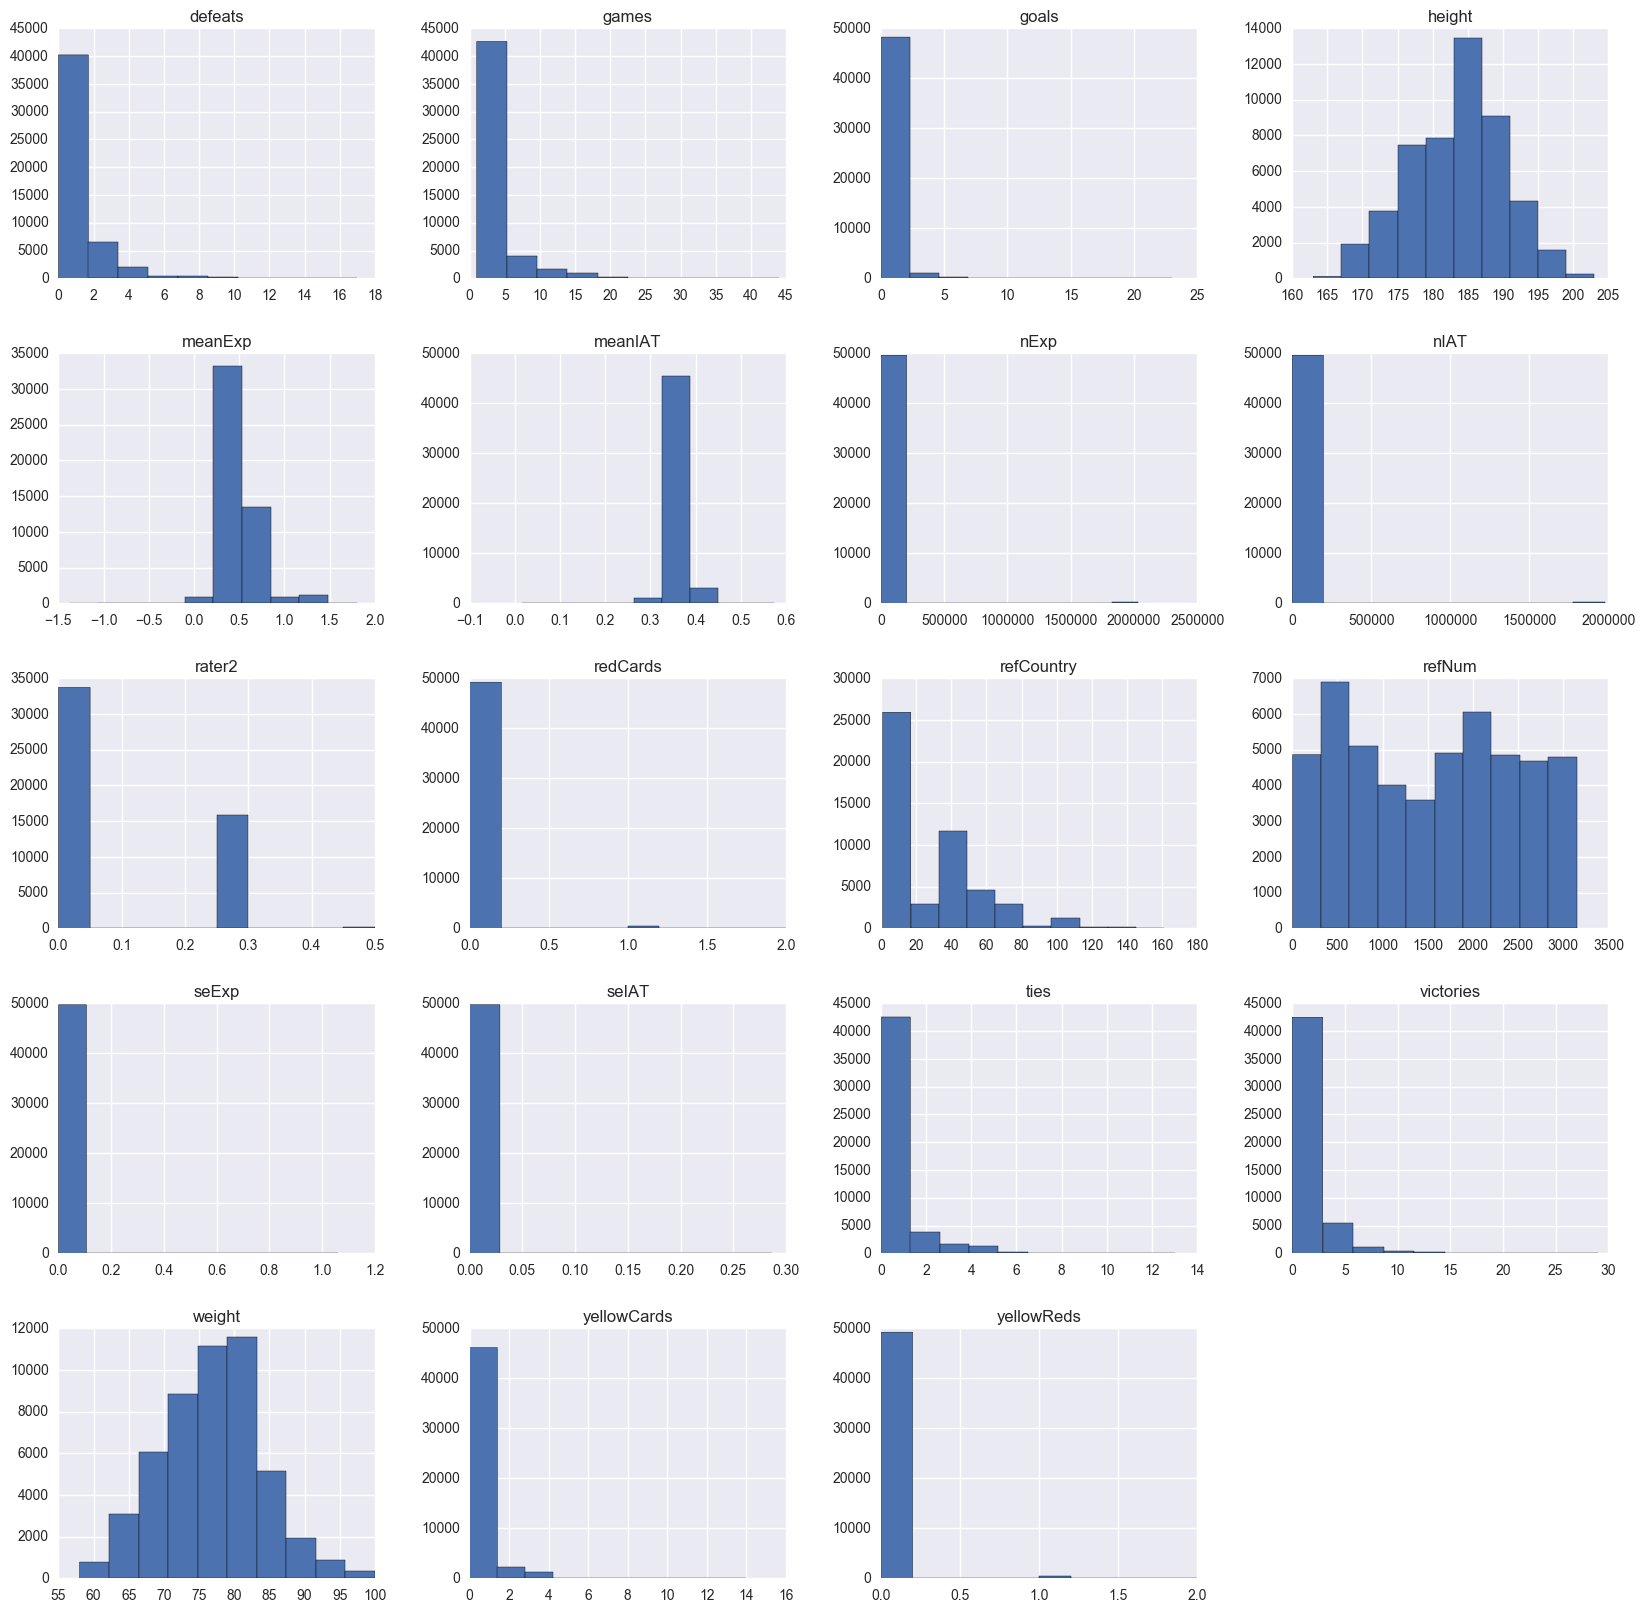

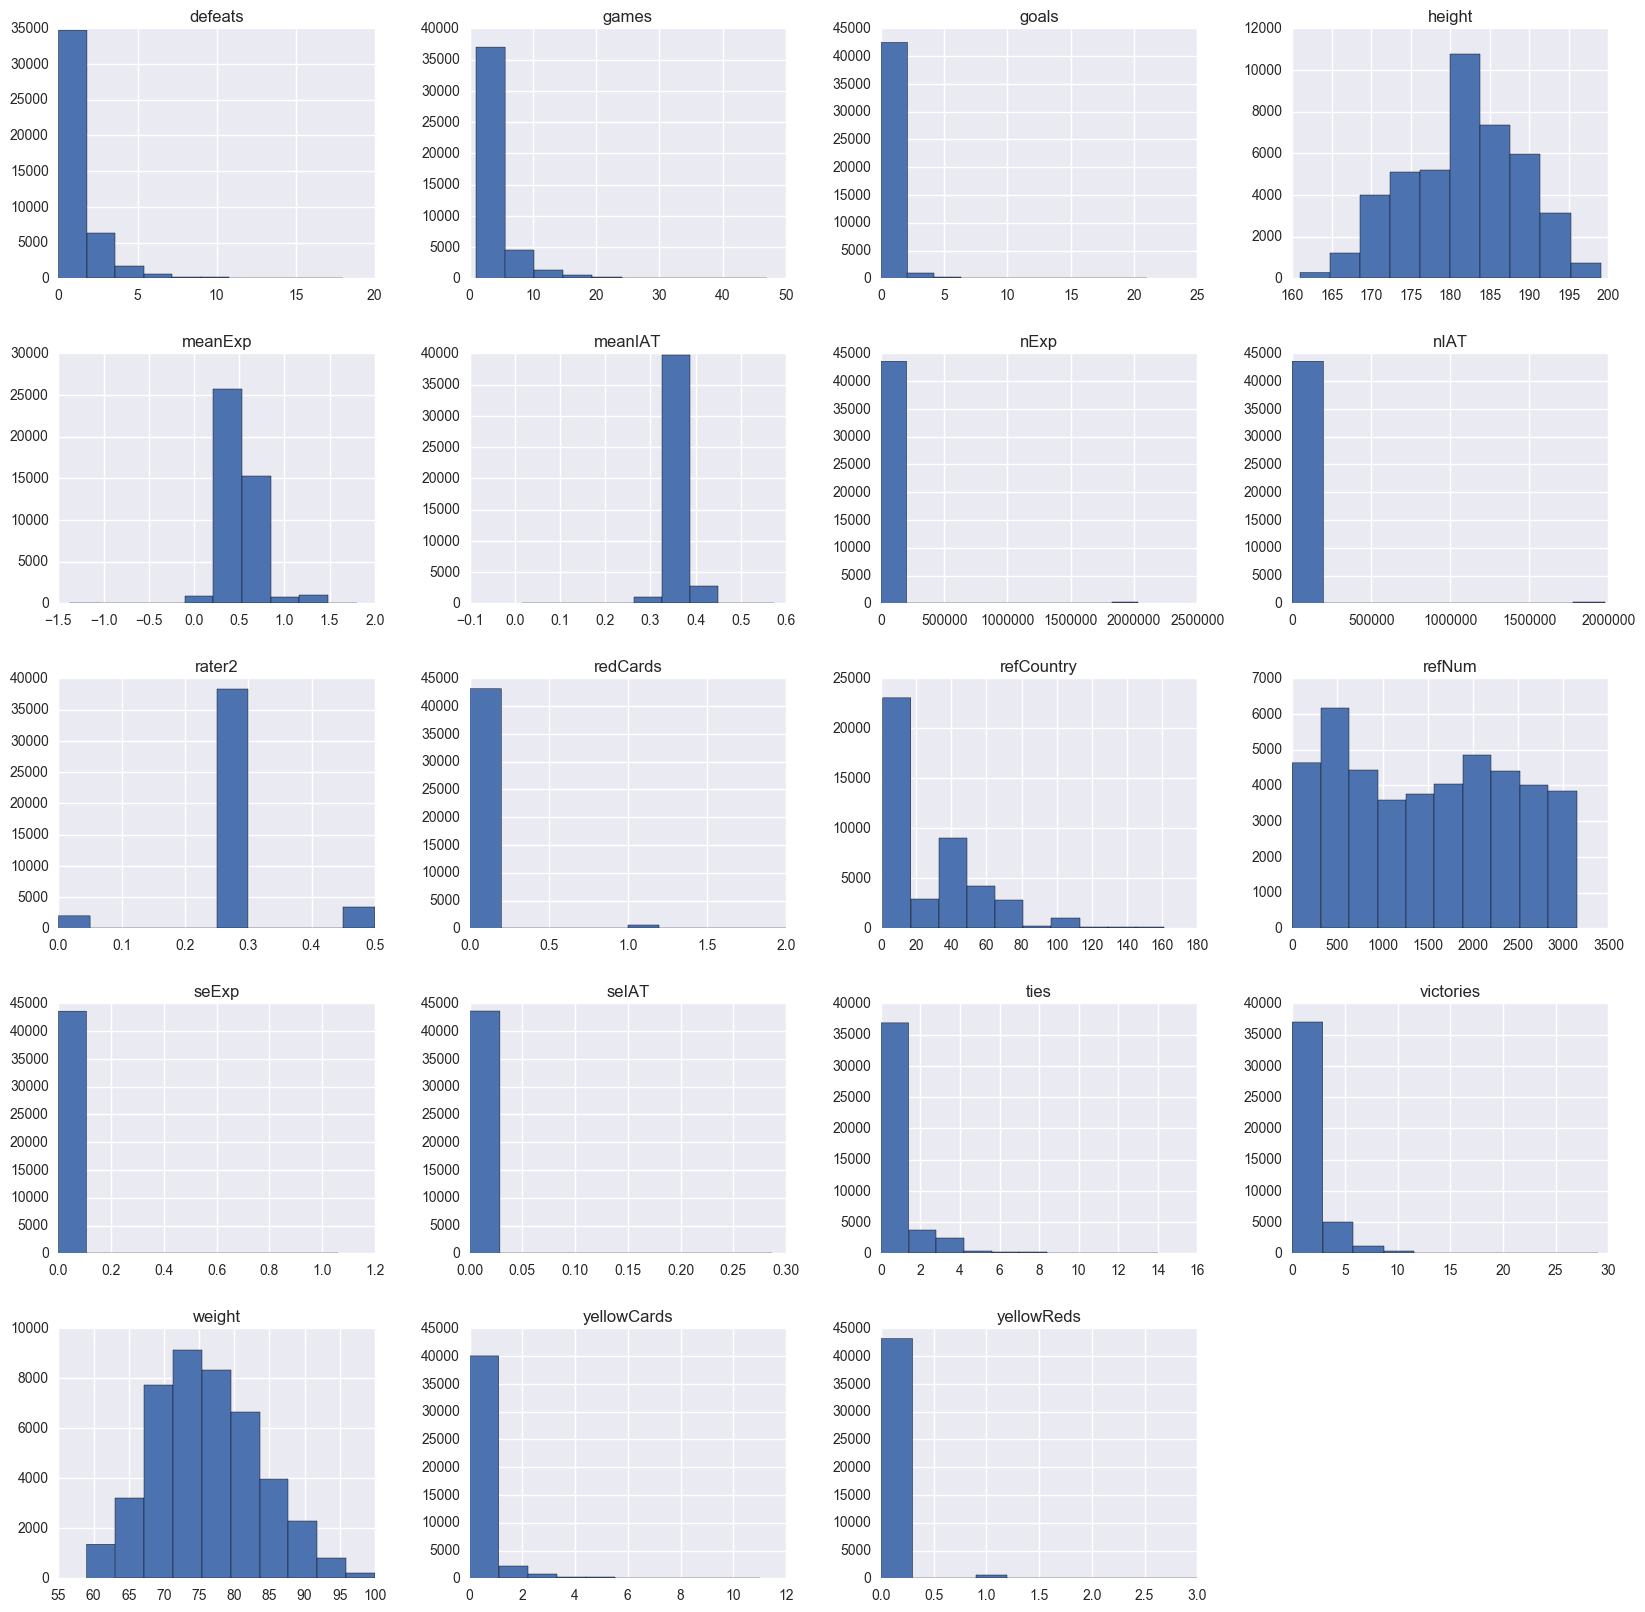

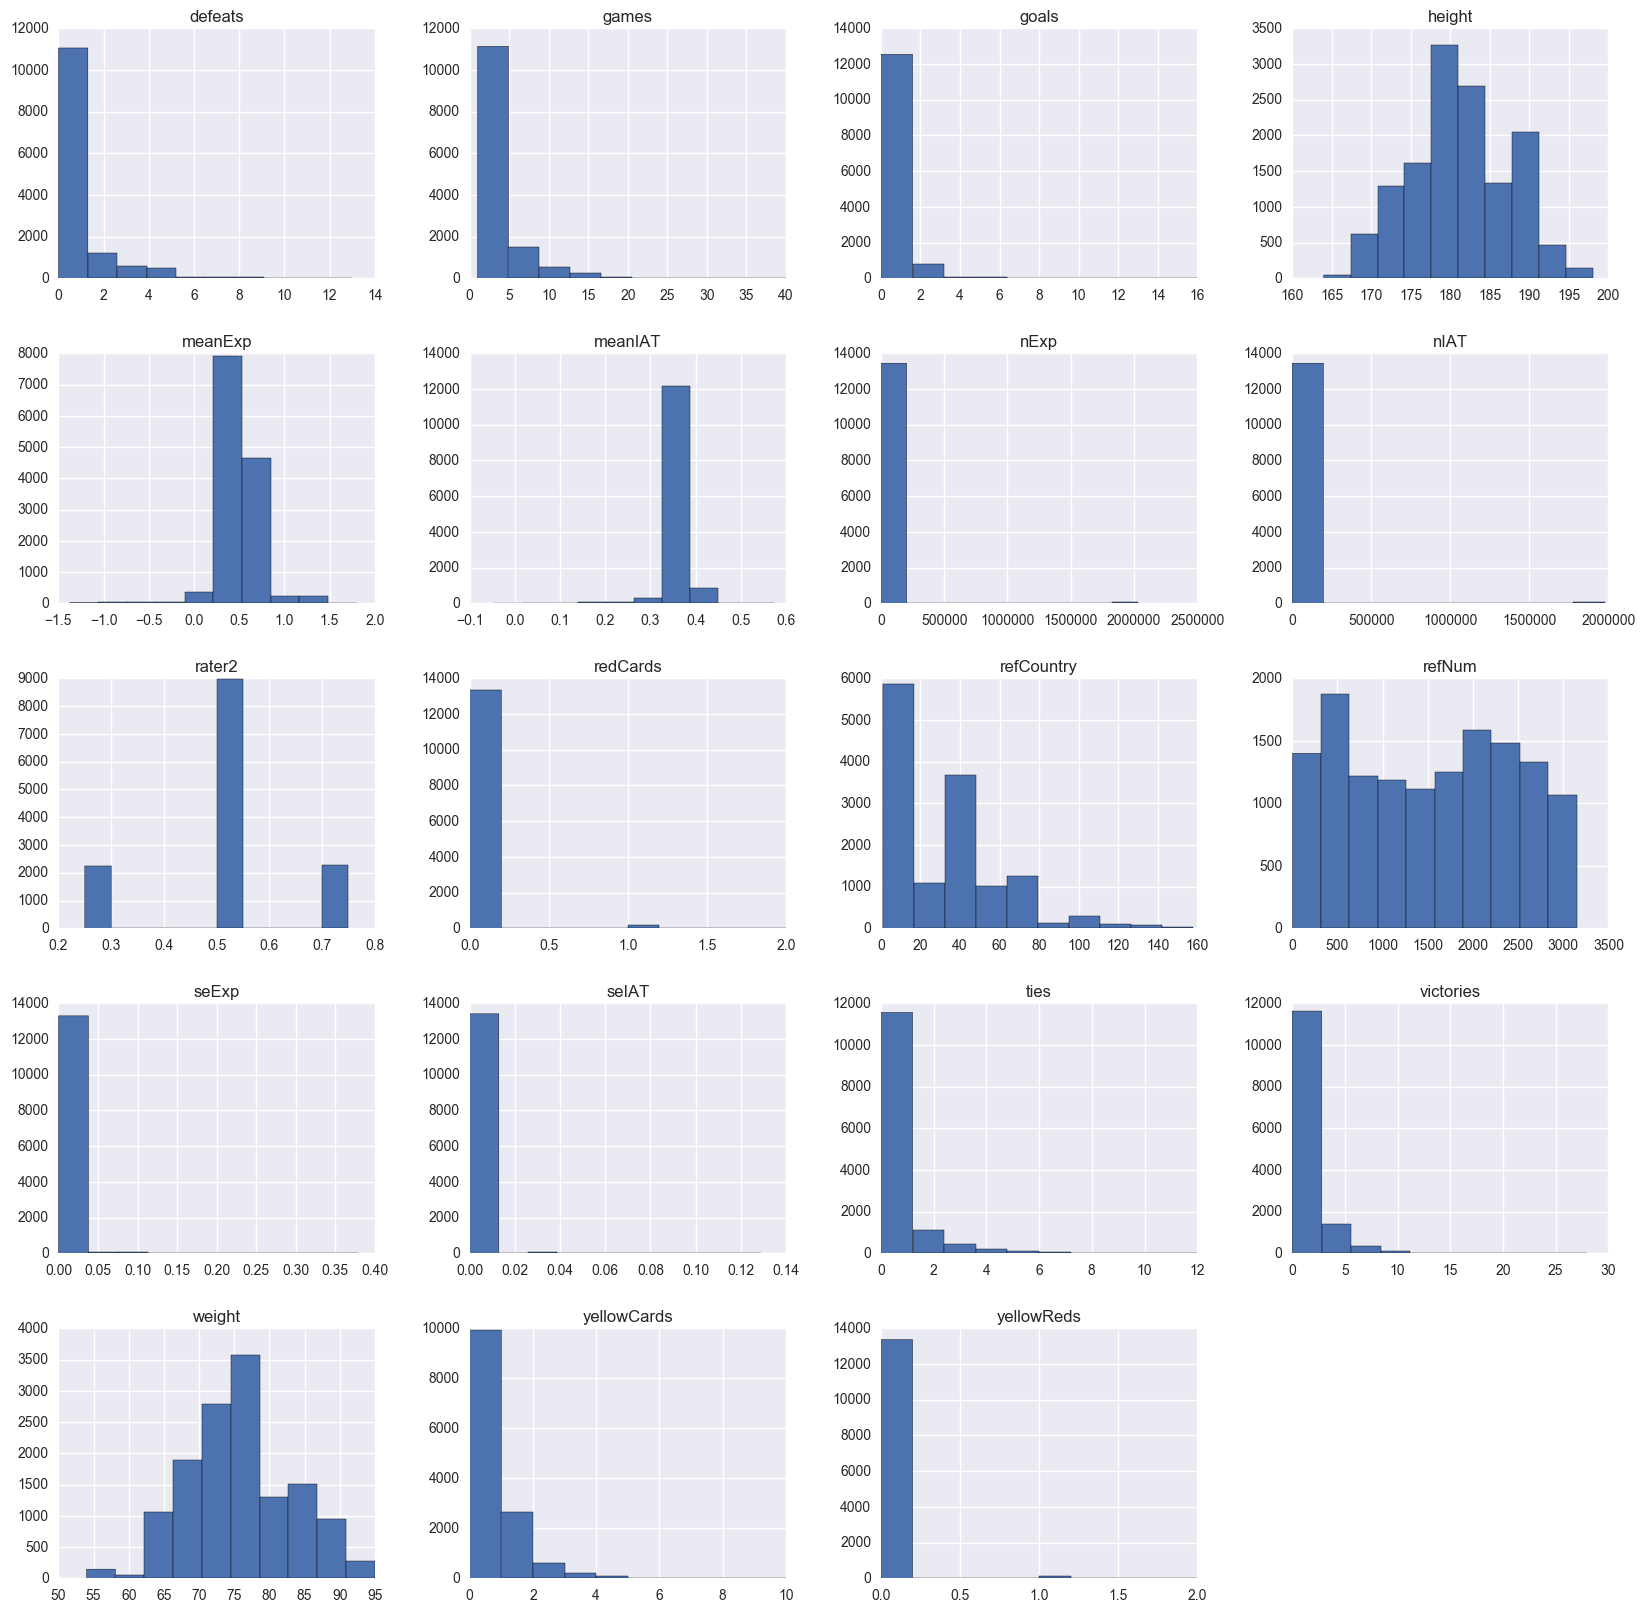

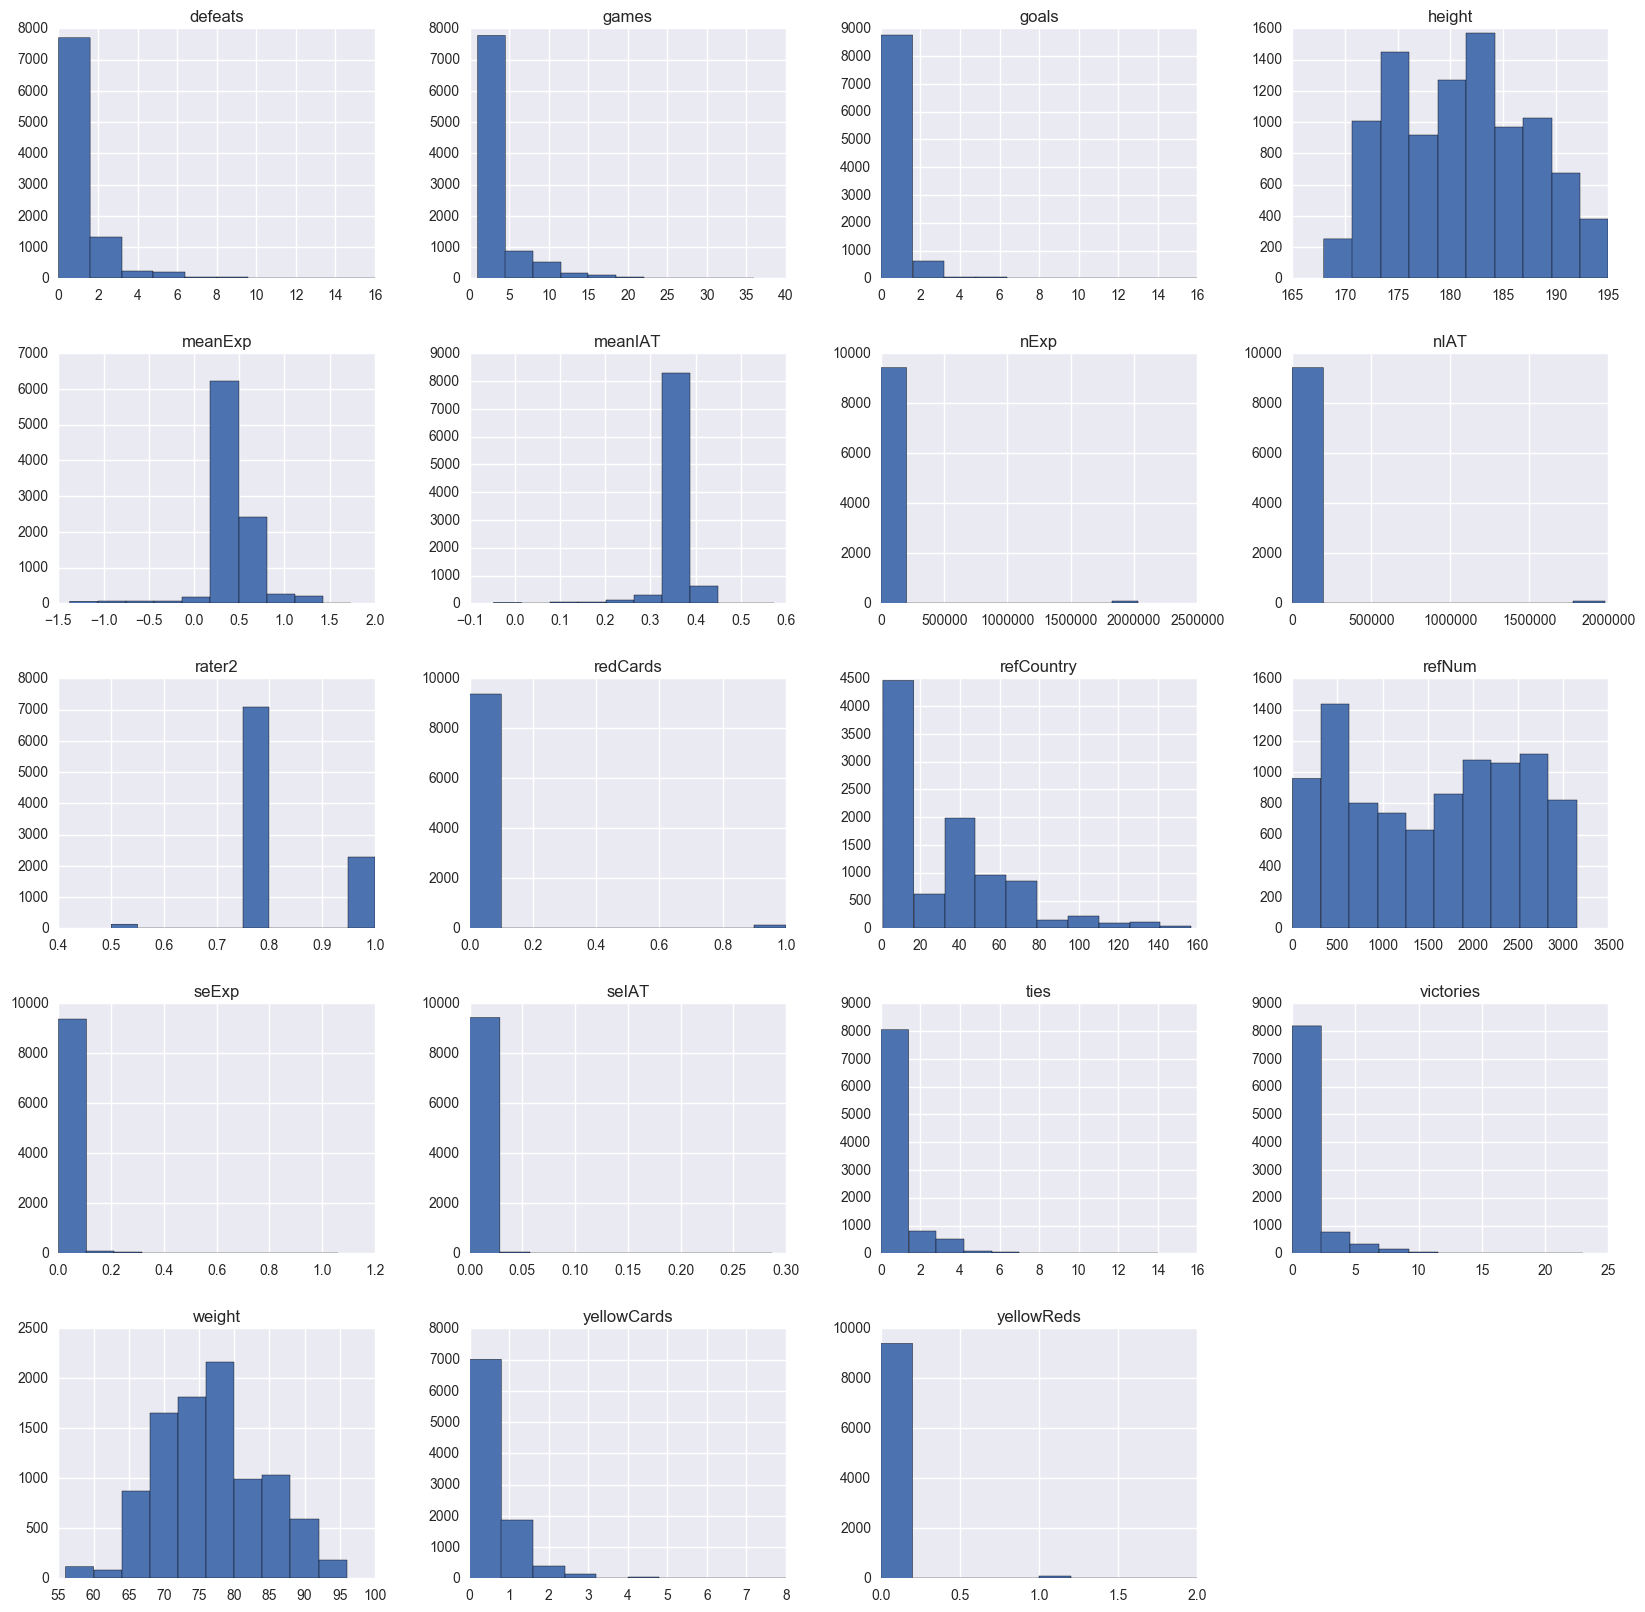

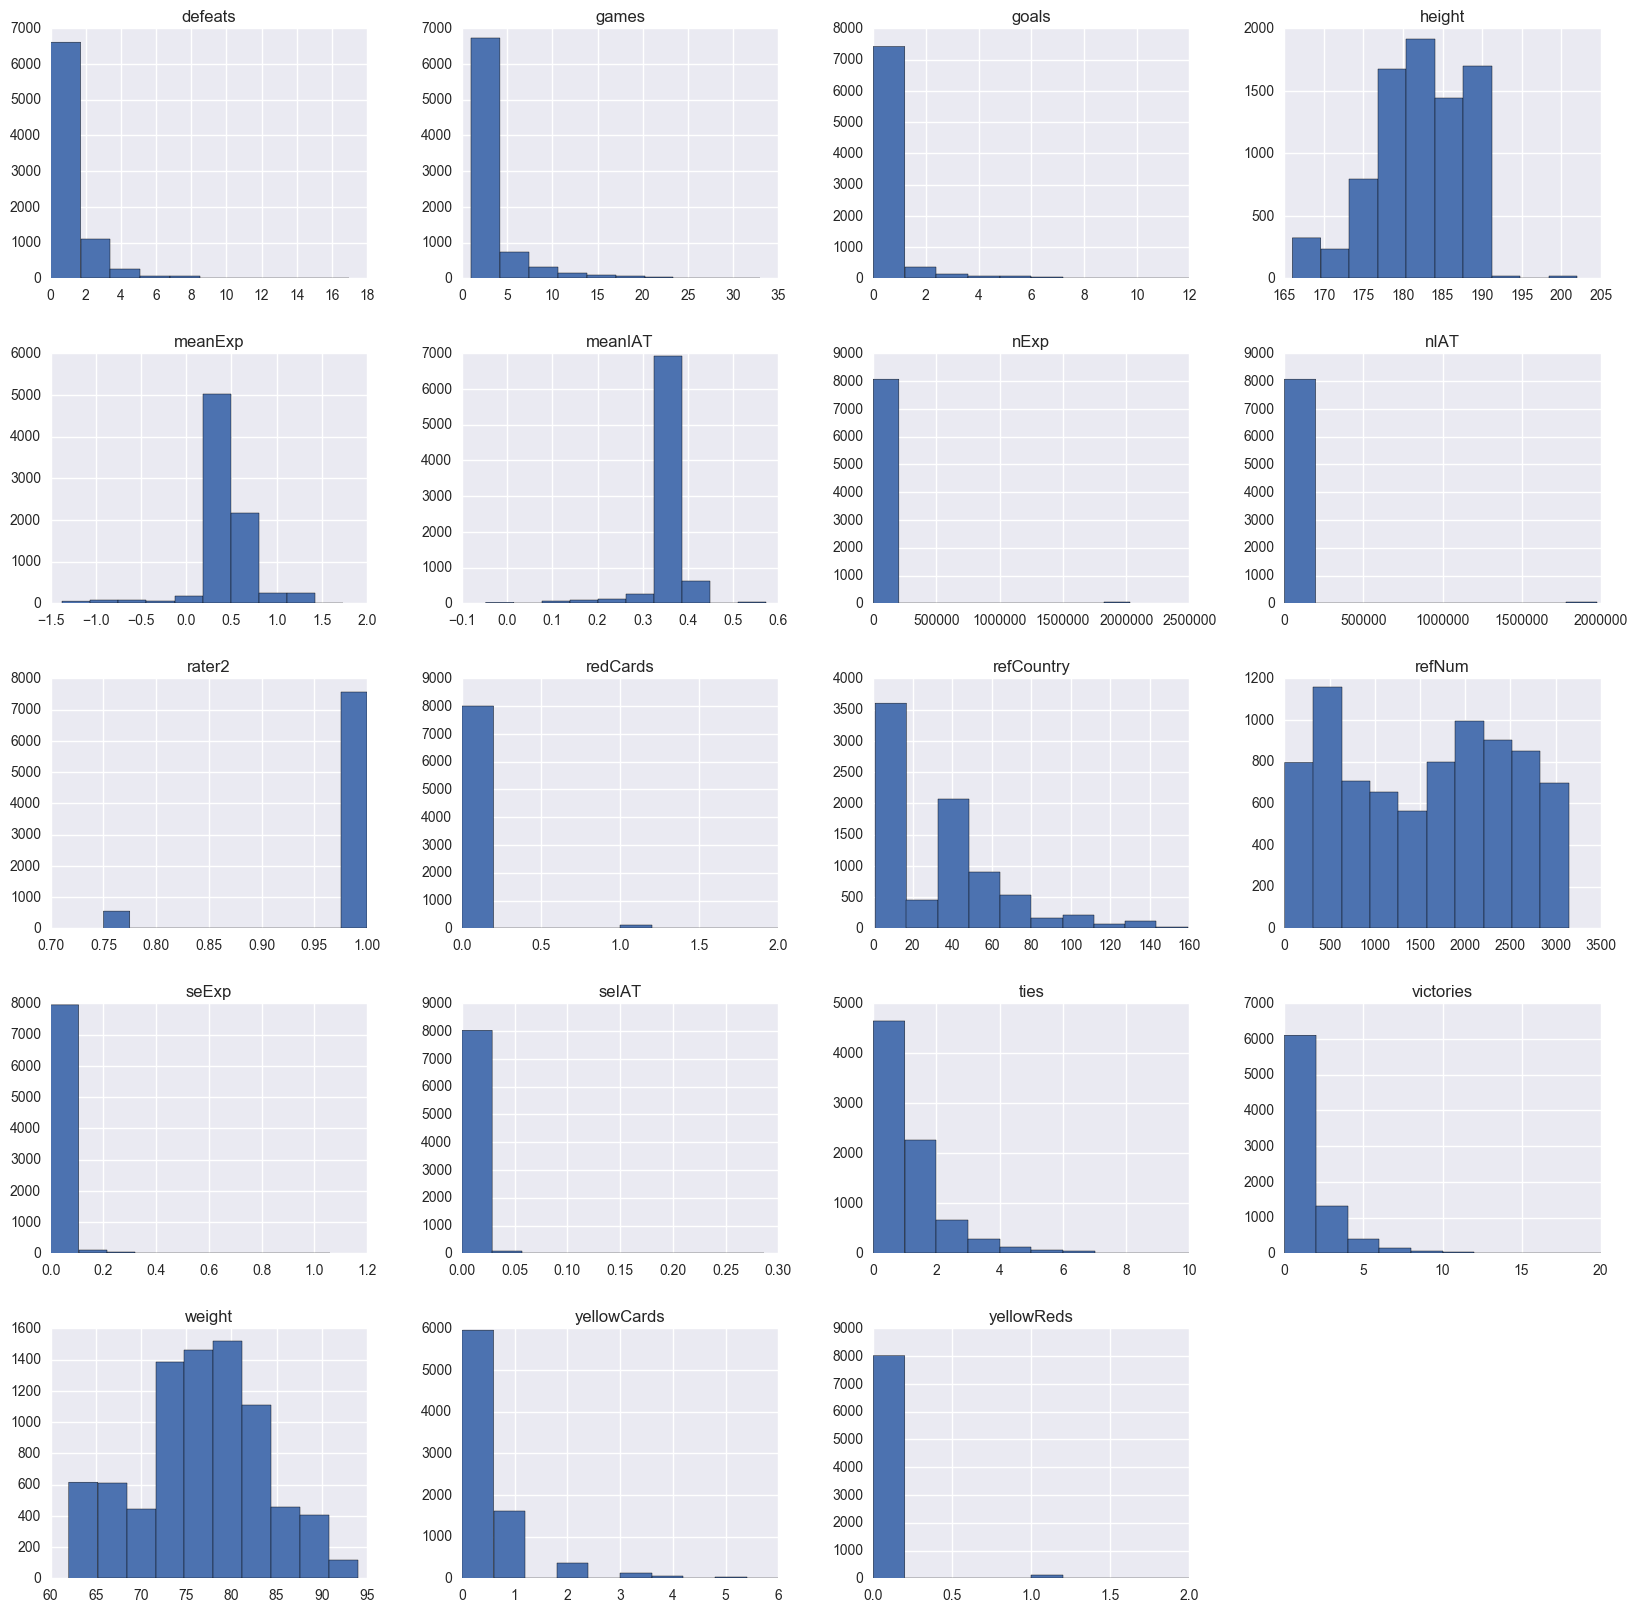

In [21]:
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 20,20
CrowdstormingDataJuly1st.groupby('rater1').hist()
plt.show()

# Encoding Categorical Variables   

In other to use our data set with the RandomForest Classifier we have to encode the categorical variables present in the data set (These are the columns of data type object).Encoding basically gives each categorical value in the affected column(column with data type object) a unique identification number. This number is a reference to the object value it represent in the affected column. In this part of the of the homework, we provide provided step by step guide on how to do this. For Example "Attacking MidFielder" in the position column can be encoded as 1.


Below we collect all columns of object datatype from our data set below in CrowdstormingDataJuly1st_object_columns. The aim of this is be able to encode such columns at once. Sklearn as yet does not provide such functionality

In [13]:
CrowdstormingDataJuly1st_object_columns = CrowdstormingDataJuly1st.iloc[:, :].select_dtypes(include=['object']).columns

We defined  myFunction.MultiColumnLabelEncoder which  effectively Wraps sklearn LabelEncoder functionality(for encoding categorical variables) for use on multiple columns  of our data set. The multiple columns are those which were extracted above. As can be observed we parsed all such columns into myFunction.MultiColumnLabelEncoder.

In [14]:
#create an instance of MultiColumnLabelEncoder and Pass the columns extracted to it
ColumnObjectEncoder = myFunction.MultiColumnLabelEncoder(columns=CrowdstormingDataJuly1st_object_columns )


 The fit method of myFunction.MultiColumnLabelEncoder accesses individual column of our dataset via indexing. This effectively returns the columns of our data set which are of type object.

In [15]:
ColumnObjectEncoder.fit(CrowdstormingDataJuly1st)

MultiColumnLabelEncoder(columns=Index(['playerShort', 'player', 'club', 'leagueCountry', 'birthday',
       'position', 'photoID', 'Alpha_3'],
      dtype='object'))

We transform the columns of  object data type to encoded labels. This we do by calling ColumnObjectEncoder.transform.

In [16]:
# Finally transform 
ColumnObjectEncoder.transform(CrowdstormingDataJuly1st)
CrowdstormingDataJuly1st.shape

(124621, 28)

# Machine Learning Data Preparation
For the Random Forest Classifier we  convert our data set to array  and use one of rater1 and rater2 as our target variables. 


We extract rater1 and rater2 from the dataset and store them as an array called  TargetVAriableRater_Array_Values. We also compute the mean of the this and use it as our target variable called TargetVAriableRater.

In [17]:
TargetVAriableRater = CrowdstormingDataJuly1st[['rater1','rater2']]
TargetVAriableRater_Array_Values = TargetVAriableRater.iloc[: , : ].values
TargetVAriableRater = np.mean(TargetVAriableRater_Array_Values,axis=1)
TargetVAriableRater.shape

(124621,)

One non obvious effect of the above computation is the fact that the number of unique values in our target(rater1 or rater2)  is increased. This is because we are now using mean value of rater1 and rater2. Comparing the output below, the contrast becomes obvious.

In [18]:
print("values of targets before mean computation: " + str(CrowdstormingDataJuly1st.rater1.unique()))
print("values of new targets  after computing mean of rater1 and rater2: " + str(np.unique(TargetVAriableRater)))

values of targets before mean computation: [ 0.25  0.75  0.    1.    0.5 ]
values of new targets  after computing mean of rater1 and rater2: [ 0.     0.125  0.25   0.375  0.5    0.625  0.75   0.875  1.   ]


We drop the rater1 and rater2 from our remaining dataset since we have extrated it separately as shown above for use as target. Leaving the rater1 and rater2 in the data set will introduce some bias. In addition we output the shape of the remaining dataset.
We store the dataset from which rater1 and rater2 hve been removed as an array called CrowdstormingDataJuly1st_Array. We have to do this conversion to array to be able to use in for Random forest classification. 

In [19]:
CrowdstormingDataJuly1st.drop(['rater1','rater2'], axis=1,inplace='True')
CrowdstormingDataJuly1st_Array = CrowdstormingDataJuly1st.iloc[: , : ].values
CrowdstormingDataJuly1st_Array.shape

(124621, 26)

# Random Forest Classifier


We  Split the Arrays generated from above  into train - test with 80 for train set and 20% for test. This enables us to train with the train sets and test with the test sets.

In [20]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(CrowdstormingDataJuly1st_Array,TargetVAriableRater , 
                                                    train_size=0.80, random_state=42)


Here we Import RandomForestClassifier and set an instance of it as RandomForestClassifier  . Note that the default uses Gini as  criterion in the classification. 

In [21]:
from sklearn.ensemble import RandomForestClassifier
ForestClassifier = RandomForestClassifier(max_leaf_nodes=240,n_estimators=100,random_state=2,min_samples_split=2)

In other to use the y_tain in the ForestClassifier we have to convert it to string type. Note that if we use RandomForestRegression we need not convert to string.

In [22]:
y_train = np.asarray(y_train, dtype="|S6")


We train our the ForestClassifier on the training sets ( y_train , x_train)

In [23]:
ForestClassifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=240,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

#  Predictions And Accuracy Score

Having trained the ForestClassifier lets save some predictions using the X_test set. We note that y_pred is now the prediction our trianed model made when X_test was parsed to it. pred_train is how prediction by our model when x_test is parsed to it.

In [24]:
y_pred= ForestClassifier.predict(X_test)
pred_train= ForestClassifier.predict(X_train)


We now have to test the accuracy of the prediction our model as made.This we do by comparing the y_test (from the splitting of  data set) and pred_train( the predicted values generated by model when X_test is parsed to it ).  Also note that we converted y_test to string type

In [25]:
import sklearn as sk
from sklearn.metrics import accuracy_score
y_test = np.asarray(y_test, dtype="|S6")
#y_test_pred = np.asarray(y_test_first, dtype="|S6")
print("accuracy score for test set: "+ str( sk.metrics.accuracy_score(y_test, y_pred , normalize=True)) )
print("Accuracy score for training set: " + str( sk.metrics.accuracy_score(y_train, pred_train,normalize=True)) )

accuracy score for test set: 0.843370110331
Accuracy score for training set: 0.848669956668


We obtain an accuracy score of 84 which is good enough. We Would not want to go above this since then the model might grossly be overfitting. Importantly we noted that changing the parameters makes a lot of difference. As we shall show below changing the parameters absilutely affects underfitting and overfitting and importantly accuracy.

Another way to verify the accuracy of our predictions is using confusion matrix. 

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[6608,    1,  200,    0,    0,    0,    0,    0,    0],
       [ 471, 2735,  379,    0,    0,    0,    0,    0,    0],
       [ 135,    0, 7591,    0,    0,    0,    0,    0,    0],
       [ 231,    0,  339,  560,    0,    0,    0,    0,    0],
       [ 258,    0,  321,    0, 1157,    0,    0,    0,    0],
       [ 141,    2,  198,    0,    0,  147,    0,    0,    0],
       [ 288,    0,  272,    0,    0,    0,  823,    0,    0],
       [  93,    3,  140,    0,    0,    0,    0,  302,    2],
       [ 137,    3,  290,    0,    0,    0,    0,    0, 1098]])

To interterprete the matrix above: The diagonal elements show the number of correct classifications for each class.
The off-diagonal elements provides the misclassifications. In particular note that we have the target labels as     [0, 0.125,  0.25 ,  0.375 ,  0.5  ,    0.625 , 0.75  , 0.875 , 1.   ]. Making these labels the header and index of the above matrix and we can read out how the diagonals represent the correct classification and misclassification. For example in  Row 2 column 1, 471 will represent those values that are class 0.125 but misclassified as 0. With this confusion matrix we are convinced that the classification problem can be reduced to binary classification . We only have to use 0.5 as the the middle point (below 0.5 is black above white)

Lastly we give the r2_score of our model. r2_score computes the coefficient of determination (https://en.wikipedia.org/wiki/Coefficient_of_determinationprovides ). It is a measure of how well future samples are likely to be predicted by the model. We obtained a value of 0.56 (1 being the best). We model r2_score can be increased by changing the parameters.

In [27]:
from sklearn.metrics import r2_score
y_test_r2core=y_test.astype(np.float)
y_pred_r2score = y_pred.astype(np.float)

print("r2 score for test set: "+ str( sk.metrics.r2_score(y_test_r2core, y_pred_r2score )) )


r2 score for test set: 0.564772823416


# Cross Validation To Mitigate Overfitting And Parameter Tuning


We perform cross validation on our model. The model still reports mean cross validation score of 83% which is averagely good.

In [28]:
from sklearn.cross_validation import cross_val_score

cross = (cross_val_score(ForestClassifier, X_train, y_train, cv=10))
np.mean(cross)

0.83650270296768103

We change different parameters and obtain how the model behaves. We use Cross validation combined with Grid and Randomized search to obtain the top 3 optimum models with their parameters. With this code below we have leveraged the capability of Sklearn to form one whole pipeline that gets the features , does cross validation and returns the first 3 in the set

In [149]:
print(__doc__)
from time import time
from operator import itemgetter
from scipy.stats import randint as sp_randint
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits


# build a classifier
clf = RandomForestClassifier(n_estimators=20)

# Utility function to report best scores
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [2, None],
              "max_features": sp_randint(1, 3),
              "min_samples_split": sp_randint(1, 2),
              "min_samples_leaf": sp_randint(1, 2),
              "max_leaf_nodes":sp_randint(10,15),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.grid_scores_)

# use a full grid over all parameters
param_grid = {"max_depth": [2, None],
              "max_features": [1, 2, 2],
              "min_samples_split": [1, 2, 2],
              "min_samples_leaf": [1, 2, 2],
              "max_leaf_nodes":[7,12,15],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.grid_scores_)))
report(grid_search.grid_scores_)


Automatically created module for IPython interactive environment
RandomizedSearchCV took 6.17 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.880 (std: 0.029)
Parameters: {'min_samples_leaf': 1, 'min_samples_split': 1, 'max_leaf_nodes': 14, 'max_features': 2, 'max_depth': None, 'bootstrap': True, 'criterion': 'gini'}

Model with rank: 2
Mean validation score: 0.853 (std: 0.013)
Parameters: {'min_samples_leaf': 1, 'min_samples_split': 1, 'max_leaf_nodes': 11, 'max_features': 2, 'max_depth': None, 'bootstrap': True, 'criterion': 'gini'}

Model with rank: 3
Mean validation score: 0.851 (std: 0.017)
Parameters: {'min_samples_leaf': 1, 'min_samples_split': 1, 'max_leaf_nodes': 10, 'max_features': 2, 'max_depth': None, 'bootstrap': True, 'criterion': 'gini'}

GridSearchCV took 123.68 seconds for 648 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.869 (std: 0.018)
Parameters: {'min_samples_leaf': 2, 'min_samples_split': 1, 'm

From the above output we can verify that after parameter tuning only certain features affects the accuracy. A plot of the learning shows the pattern we would have expected of a good model- The variance and bias trying to converge. In addition the parameters can still be twisted to achieve higher validation score at the expense of overfitting.

# Feature Importance

We can also use RandomForest to output how important each feature is in the classification. We have provided below the names of the column headers and the associated "imporatnce value" it has.

In [57]:

Feature_name = CrowdstormingDataJuly1st.columns # Get Column Headings of our Dataframe

print((sorted(zip(map(lambda value: round(value, 4), ForestClassifier.feature_importances_), Feature_name), 
             reverse=True))) 

[(0.13250000000000001, 'photoID'), (0.13239999999999999, 'birthday'), (0.1321, 'player'), (0.1206, 'club'), (0.1198, 'playerShort'), (0.1066, 'height'), (0.1019, 'weight'), (0.076300000000000007, 'position'), (0.0482, 'leagueCountry'), (0.0054000000000000003, 'nExp'), (0.0051999999999999998, 'meanExp'), (0.0045999999999999999, 'seExp'), (0.0044999999999999997, 'seIAT'), (0.0044000000000000003, 'nIAT'), (0.0028999999999999998, 'refCountry'), (0.0020999999999999999, 'meanIAT'), (0.00059999999999999995, 'Alpha_3'), (0.0001, 'goals'), (0.0001, 'games'), (0.0, 'yellowReds'), (0.0, 'yellowCards'), (0.0, 'victories'), (0.0, 'ties'), (0.0, 'refNum'), (0.0, 'redCards'), (0.0, 'defeats')]


Let us bless the feature importance with some visualisation!. Below we make a plot of the importance of the parameters in the model. Clearly we see that as reported by our ranking above almost only seven featues matter most!

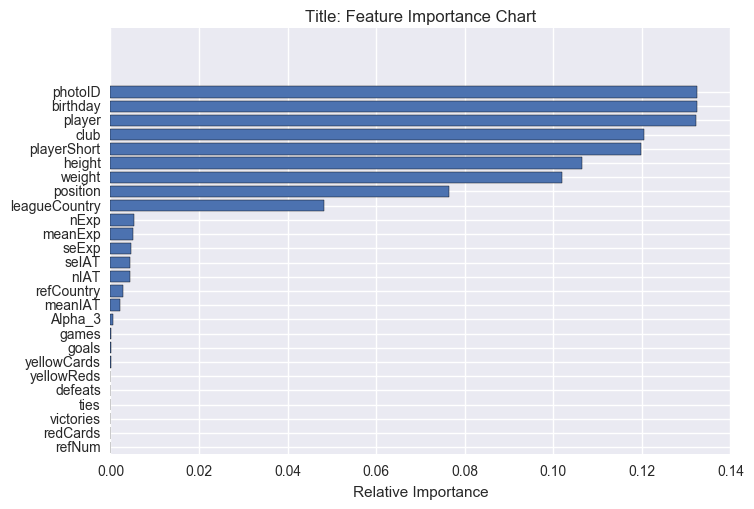

In [58]:
importances = ForestClassifier.feature_importances_
sorted_idx = np.argsort(importances)

padding = np.arange(len(Feature_name)) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, Feature_name[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Title: Feature Importance Chart")
plt.show()


# Learning curves for Our Parameters

Below we  generate various RandomForest classifier each having different parameters. The aim is to show how different parameters passed to the Classifier affect the overfitting issue. We select our best model and another model with gross overfitting. Each graph carries its own label and we have plotted them seperately to show contrast.

In [150]:
from sklearn.learning_curve import learning_curve
BestRankValidationScore=RandomForestClassifier(min_samples_leaf= 1, min_samples_split= 1, max_leaf_nodes=14,
                                               max_features= 2, max_depth=None,
                                         bootstrap= False, criterion = 'entropy')
train_best_sizes, train_best_scores, valid_best_scores = learning_curve(
BestRankValidationScore, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 15), cv=20)
           


In [133]:
ForestClassifierWithBias = RandomForestClassifier(n_estimators=400,random_state=400,min_samples_split=2)

train_sizes, train_scores, valid_scores = learning_curve(
BestRankValidationScore, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 30), cv=20)


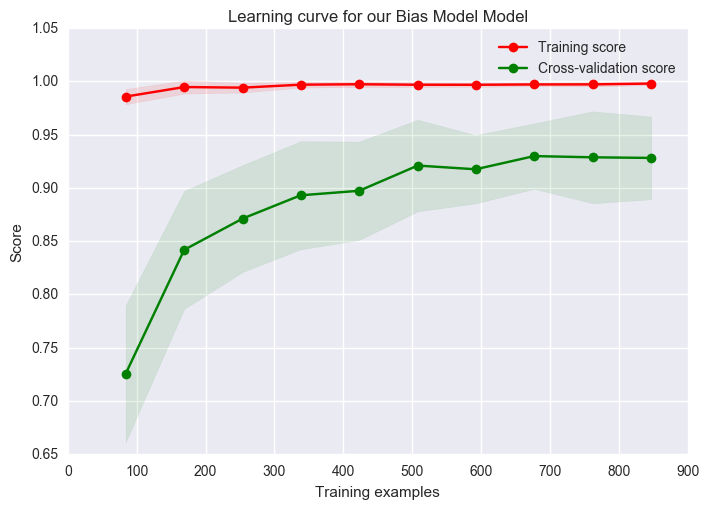

In [110]:
fig = plt.figure()
plt.title("Learning curve for our Bias Model Model")
plt.xlabel("Training examples")
plt.ylabel("Score")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
#plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")

plt.show()

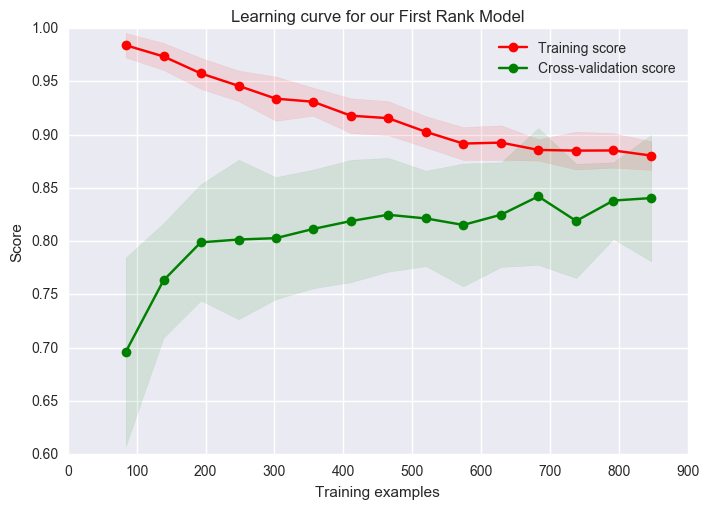

In [151]:
plt.figure()
plt.title("Learning curve for our First Rank Model")

plt.xlabel("Training examples")
plt.ylabel("Score")

train_best_scores_mean = np.mean(train_best_scores, axis=1)
train_best_scores_std = np.std(train_best_scores, axis=1)
valid_best_scores_mean = np.mean(valid_best_scores, axis=1)
valid_best_scores_std = np.std(valid_best_scores, axis=1)
#plt.grid()
plt.fill_between(train_best_sizes, train_best_scores_mean - train_best_scores_std,
                train_best_scores_mean + train_best_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_best_sizes, valid_best_scores_mean - valid_best_scores_std,
                     valid_best_scores_mean + valid_best_scores_std, alpha=0.1, color="g")
plt.plot(train_best_sizes, train_best_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_best_sizes, valid_best_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")

plt.show()

TO-DO:
         
         Remove Features and apply RandomForest